In [10]:
import pandas as pd
# Load the dataset
file_path = '/Users/namanrathi946/Documents/Amazon Sales data.csv' 
df = pd.read_csv(file_path)


In [11]:
# Display basic information
print(df.info()) 
print(df.describe()) 
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None
           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000 

In [12]:
# Convert 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract useful information from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day


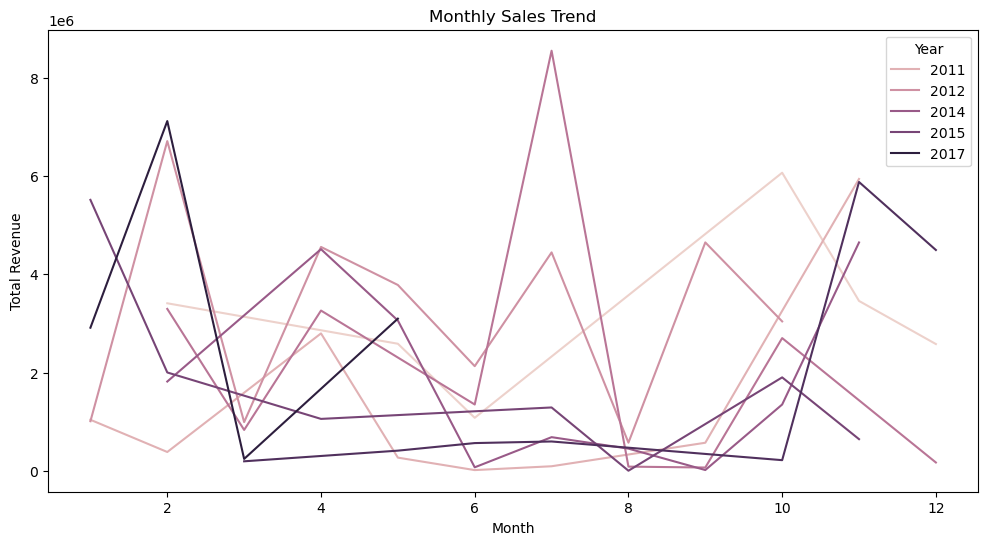

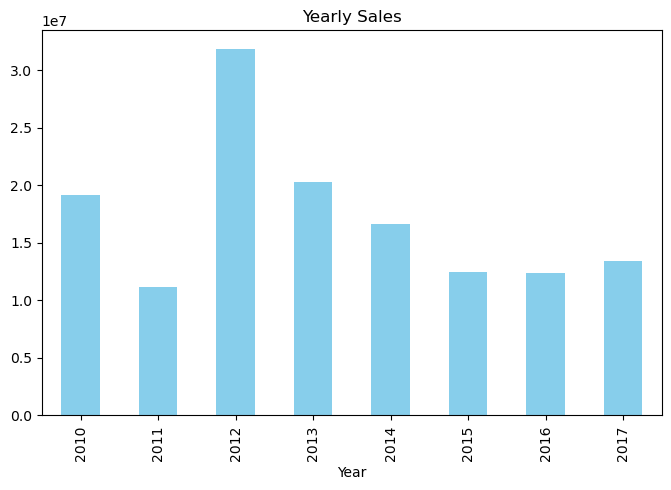

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trend using 'Total Revenue' as the sales data
monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()

# Yearly Sales Trend
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title('Yearly Sales')
plt.show()


In [14]:
import plotly.express as px

# Animated Sales Trend using 'Total Revenue'
fig = px.line(monthly_sales, x='Month', y='Total Revenue', color='Year', title='Monthly Sales Trend (Animated)',
              labels={'Total Revenue':'Sales in $', 'Month':'Month'}, 
              animation_frame='Year', animation_group='Month')

fig.show()


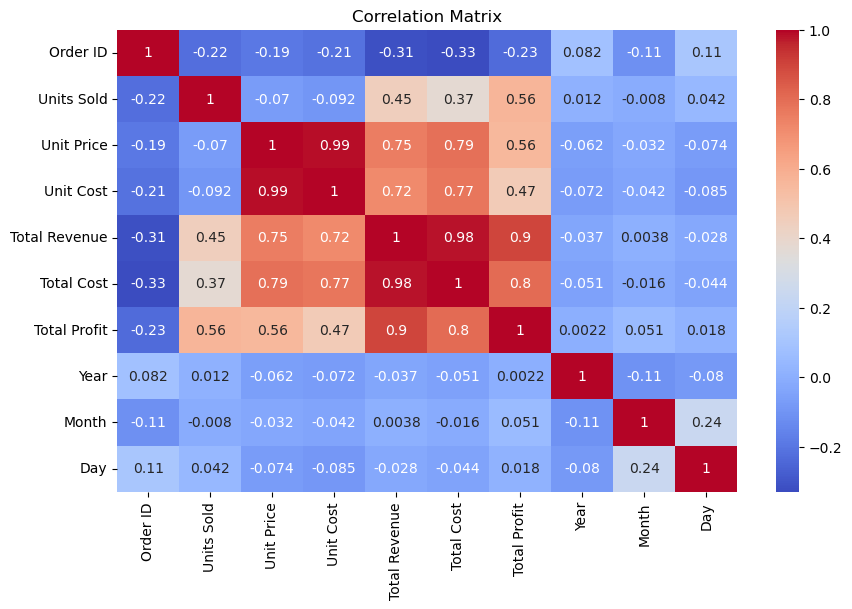

In [15]:
import numpy as np
import seaborn as sns

# Correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Summary of descriptive statistics for numeric columns
descriptive_stats = df.describe()
print(descriptive_stats)


                Order Date      Order ID   Units Sold  Unit Price   Unit Cost  \
count                  100  1.000000e+02   100.000000  100.000000  100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  5128.710000  276.761300  191.048000   
min    2010-02-02 00:00:00  1.146066e+08   124.000000    9.330000    6.920000   
25%    2012-02-14 12:00:00  3.389225e+08  2836.250000   81.730000   35.840000   
50%    2013-07-12 12:00:00  5.577086e+08  5382.500000  179.880000  107.275000   
75%    2015-04-07 00:00:00  7.907551e+08  7369.000000  437.200000  263.330000   
max    2017-05-22 00:00:00  9.940222e+08  9925.000000  668.270000  524.960000   
std                    NaN  2.606153e+08  2794.484562  235.592241  188.208181   

       Total Revenue    Total Cost  Total Profit         Year       Month  \
count   1.000000e+02  1.000000e+02  1.000000e+02   100.000000  100.000000   
mean    1.373488e+06  9.318057e+05  4.416820e+05  2013.230000    6.260000   
min     4.870260e+03  3.612240e+03  1.2

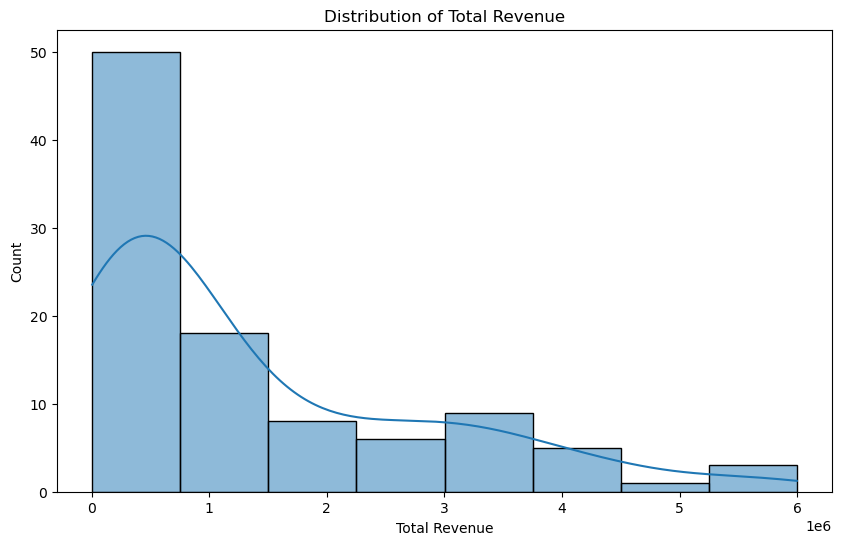

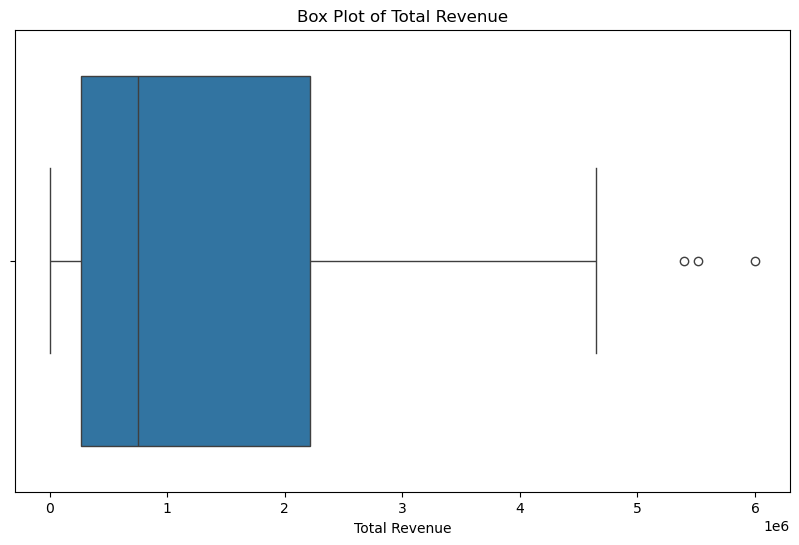

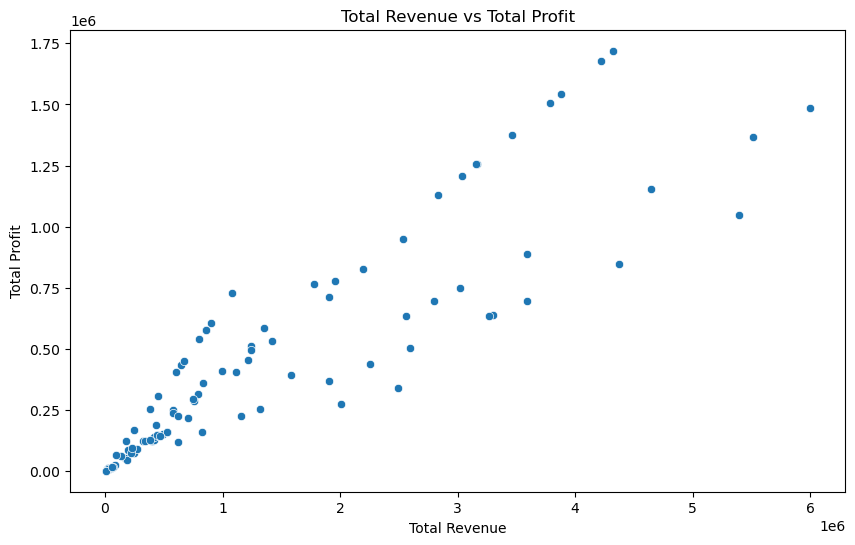

In [17]:
# Histogram for visualizing the distribution of 'Total Revenue'
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Revenue'], kde=True)
plt.title('Distribution of Total Revenue')
plt.show()

# Box plot for 'Total Revenue'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Revenue'])
plt.title('Box Plot of Total Revenue')
plt.show()

# Scatter plot of 'Total Revenue' vs 'Total Profit'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Revenue', y='Total Profit', data=df)
plt.title('Total Revenue vs Total Profit')
plt.show()


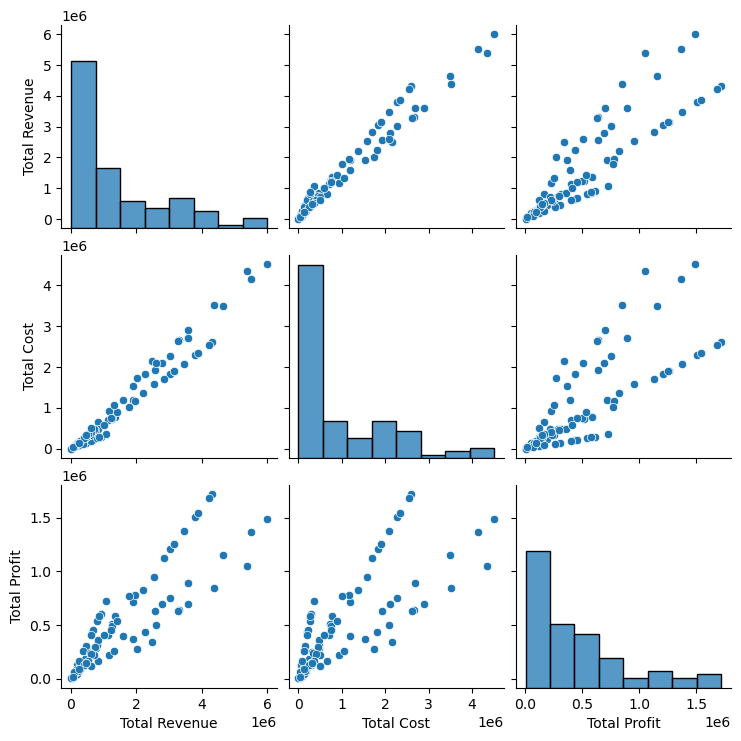

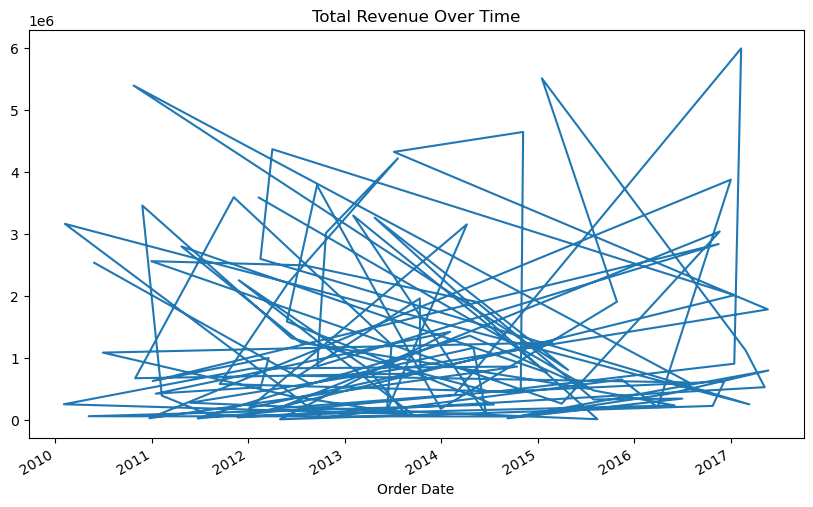

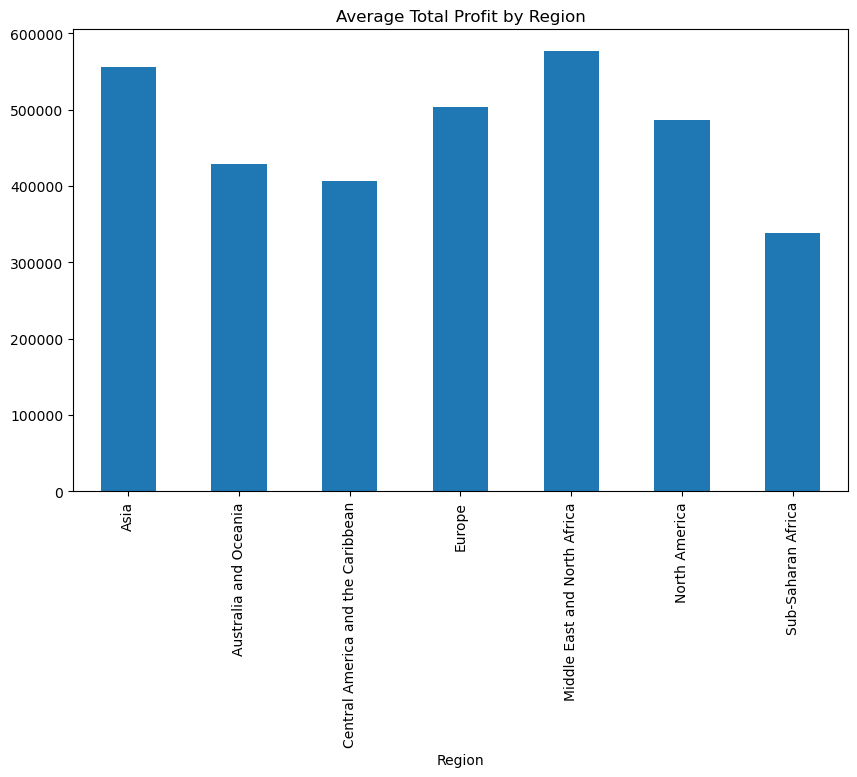

In [18]:
# Pair plot for selected numeric columns
sns.pairplot(df[['Total Revenue', 'Total Cost', 'Total Profit']])
plt.show()

# Line plot for 'Total Revenue' over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
df['Total Revenue'].plot(figsize=(10, 6))
plt.title('Total Revenue Over Time')
plt.show()

# Grouped bar plot of average 'Total Profit' by 'Region'
plt.figure(figsize=(10, 6))
df.groupby('Region')['Total Profit'].mean().plot(kind='bar')
plt.title('Average Total Profit by Region')
plt.show()
